In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd
from fluxdataqaqc import Data, QaQc, Plot
from bokeh.plotting import figure, show, ColumnDataSource
from bokeh.models.formatters import DatetimeTickFormatter
from bokeh.models import LinearAxis, Range1d
from bokeh.io import output_notebook
output_notebook()

import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Loading BokehJS ...

## Load input

In [4]:
station = 'US-UTW'
config_path = f'../station_config/{station}.ini'
d = Data(config_path)
d.df.index.freq = '30min'
df = d.df.rename(columns=d.inv_map)
# get some metadata for saving
site_id = d.site_id
vars_we_want = ['H', 'LE', 'Rn', 'G']
# rename variables, calculate basice statistics table and save to HTML
df[vars_we_want].rename(columns=d.variables).describe().to_html('{}.html'.format(site_id))

q = QaQc(d, daily_frac=3/4, max_interp_hours=4, max_interp_hours_night=6)

# make copies of daily results of different correction options
q.correct_data(meth='ebr', et_gap_fill=True)
ebr_gapfilled = q.df

#q.correct_data(meth='br',et_gap_fill=True)
#br_gapfilled = q.df

q.monthly_df
q.write()

Calculating mean for var: THETA from columns: ['SWC_1_1_1', 'SWC_2_1_1']
Converting vpd from hpa to kpa
Calculating vapor pressure from vapor pressure deficit and air temperature
Calculating dew point temperature from vapor pressure

The input data temporal frequency appears to be less than daily.
Data is being resampled to daily temporal frequency.
Linearly interpolating gaps in energy balance components up to 6 hours when Rn < 0 and up to 4 hours when Rn >= 0.
Filtering days with less then 75.0% or 36/48 sub-daily measurements
gridMET reference ET already downloaded for station at:
H:\UGS_Flux\Data_Processing\Jupyter_Notebooks\EasyFlux_to_Campbell\station_config\gridMET_data\US-UTW_39.4417N_-110.7250W.csv
not redownloading.
Gap filling ET_corr with filtered ETrF x ETr (gridMET)


In [7]:
d.df

,input_LE,input_H,input_G,WD,WS,RH_1_1_1,VPD,T_SONIC,SWC_1_1_1,SWC_2_1_1,NETRAD,SW_IN,SW_OUT,LW_IN,LW_OUT,theta_mean,vp,es,t_dew
date,,,,,,,,,,,,,,,,,,,
2021-05-20 08:30:00,204.4270,45.375040,109.02860,325.45840,1.058091,28.739370,1.348018,17.67042,28.09303,26.85778,523.0268,686.9564,126.4219,303.0367,427.7019,27.475405,0.673585,2.021603,1.196813
2021-05-20 09:00:00,219.1420,12.342120,120.15200,316.85820,1.411548,24.481550,1.603527,19.26203,28.23343,26.86310,601.9861,770.5314,137.6554,310.6556,440.7421,27.548265,0.630046,2.233573,0.272500
2021-05-20 09:30:00,306.0595,-12.312750,129.35460,175.54210,5.877390,20.747690,1.928581,21.15169,28.38277,26.91096,691.7921,852.9324,152.5621,315.3688,439.8199,27.646865,0.581692,2.510273,-0.823898
2021-05-20 10:00:00,364.8052,10.020130,87.96967,167.78490,6.385247,18.384150,2.077099,21.82829,28.54087,26.96453,756.3923,927.3834,165.2501,316.7595,446.5294,27.752700,0.539287,2.616386,-1.855101
2021-05-20 10:30:00,440.8007,5.704775,110.41050,184.17380,7.425657,17.958990,2.129389,22.16283,28.64948,26.98232,810.3519,984.3762,172.3151,318.8624,451.9486,27.815900,0.540897,2.670286,-1.814648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-19 10:00:00,413.1413,41.951720,169.32930,61.89768,1.302451,7.368328,2.368460,21.64405,20.12710,19.57225,777.8170,1058.7000,159.1353,312.1473,433.8949,19.849675,0.218650,2.587110,-13.578130
2024-06-19 10:30:00,530.8002,72.434170,172.69210,228.81070,1.554689,5.900248,2.577512,22.71789,20.25329,19.62647,833.6266,1123.2410,164.8656,315.5357,440.2843,19.939880,0.184343,2.761855,-15.681449
2024-06-19 11:00:00,488.8706,78.313340,165.72350,154.22630,2.349376,5.284157,2.697134,23.33442,20.36959,19.65221,875.1078,1173.0520,170.1489,317.4822,445.2776,20.010900,0.169635,2.866769,-16.693893


In [6]:
ebr_gapfilled

,T_SONIC,SW_OUT,input_G,input_H,SWC_2_1_1,SWC_1_1_1,LW_IN,RH_1_1_1,es,NETRAD,...,ET,ET_corr,gridMET_ETr,gridMET_ETo,gridMET_prcp,ETrF,ETrF_filtered,ET_fill,ET_gap,ET_fill_val
date,,,,,,,,,,,,,,,,,,,,,
2021-05-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,10.051195,14.1,9.4,0.0,NaN,0.712851,10.051195,True,10.051195
2021-05-21,16.244161,42.567572,-10.112438,-47.461760,25.335742,26.501325,328.338150,25.622743,1.870252,124.574898,...,3.450279,6.411638,9.1,6.0,0.0,0.704576,0.741884,6.751140,False,NaN
2021-05-22,11.423597,40.340333,-6.982685,-7.109466,23.861475,24.839243,302.924508,18.241680,1.415657,112.493020,...,2.335039,4.340978,8.5,5.8,0.0,0.510703,0.717573,6.099374,False,NaN
2021-05-23,10.083562,55.622281,-0.125685,13.991777,23.209164,24.190215,290.308333,30.372326,1.259163,190.005219,...,3.230101,6.001276,6.5,4.7,0.0,0.923273,0.725640,4.716658,False,NaN
2021-05-24,11.356567,73.641898,8.458764,39.250973,22.651888,23.616013,280.899615,34.986726,1.426761,246.568210,...,3.394000,6.300263,7.6,5.6,0.0,0.828982,0.725640,5.514861,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-15,22.592958,80.050119,0.438064,-20.795779,34.253399,25.200190,346.460246,27.672473,2.878362,253.840304,...,5.809826,10.389492,12.6,8.8,0.0,0.824563,0.854312,10.764329,False,NaN
2024-06-16,23.046420,85.405811,-1.833187,-17.480242,30.383274,23.398772,333.302400,18.003053,2.983142,285.410221,...,6.369755,11.557642,12.6,8.9,0.0,0.917273,0.835536,10.527754,False,NaN
2024-06-17,20.780443,68.784653,-11.285195,-14.782483,25.119612,21.933295,329.520035,17.240618,2.656317,240.838303,...,5.488953,9.815687,14.9,10.0,0.0,0.658771,0.851667,12.689832,False,NaN


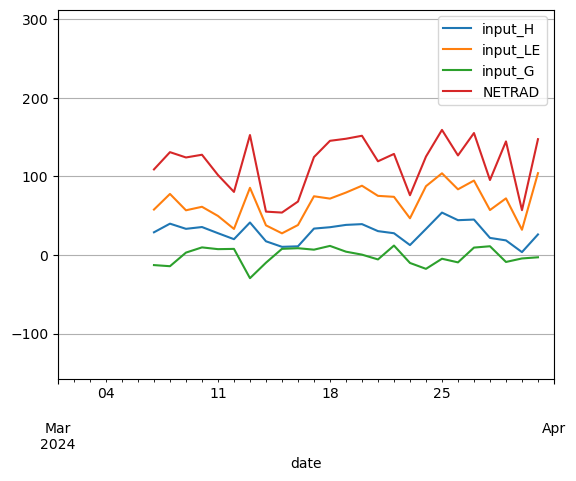

In [69]:
import matplotlib.pyplot as plt

ebr_gapfilled['Br'] = ebr_gapfilled['input_H']/ebr_gapfilled['input_LE']
#ebr_gapfilled['Br'].plot(color='green')
#plt.xlim(pd.to_datetime('2024-03-01'), pd.to_datetime('2024-04-01'))
ebr_gapfilled['input_H'].plot()
ebr_gapfilled['input_LE'].plot()
ebr_gapfilled['input_G'].plot()
ebr_gapfilled['NETRAD'].plot()
plt.xlim(pd.to_datetime('2024-03-01'), pd.to_datetime('2024-04-01'))
plt.grid()
plt.legend()


(0.0, 1.0)

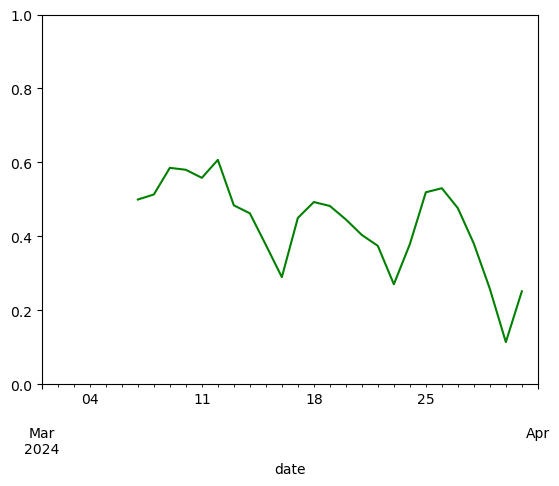

In [64]:
ebr_gapfilled['Br'].plot(color='green')
plt.xlim(pd.to_datetime('2024-03-01'), pd.to_datetime('2024-04-01'))
plt.ylim(0,1)

<Axes: xlabel='date'>

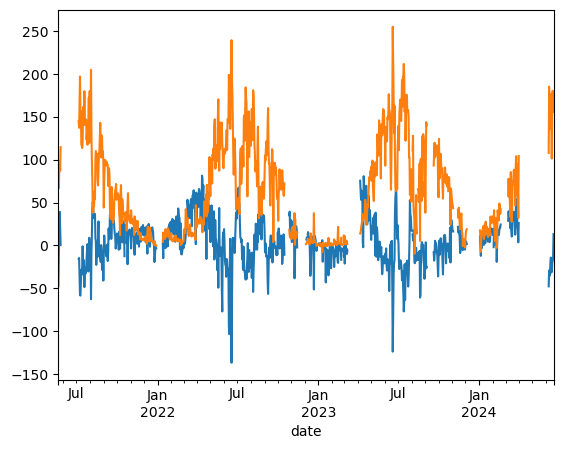

In [60]:
ebr_gapfilled['input_H'].plot()
ebr_gapfilled['input_LE'].plot()

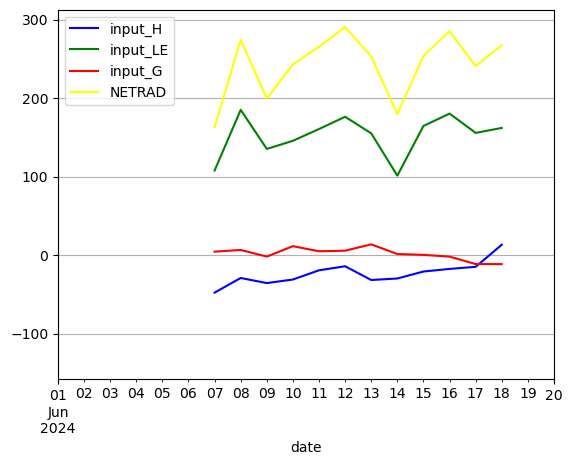

In [70]:
import matplotlib.pyplot as plt

ebr_gapfilled['input_H'].plot(color='blue')

ebr_gapfilled['input_LE'].plot(color='green')
ebr_gapfilled['input_G'].plot(color='red')

ebr_gapfilled['NETRAD'].plot(color='yellow')

plt.xlim(pd.to_datetime('2024-06-01'), pd.to_datetime('2024-06-20'))
plt.grid()
plt.legend()

<Axes: xlabel='date'>

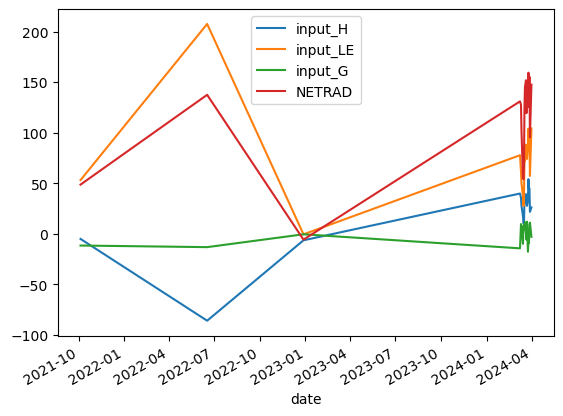

In [75]:
ebr_gapfilled[ebr_gapfilled['ebr']>=0.8][['input_H','input_LE','input_G','NETRAD']].plot()


(-1.0, 1.0)

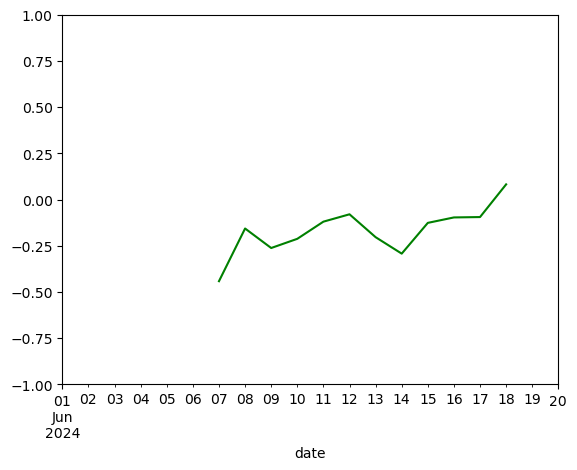

In [66]:
ebr_gapfilled['Br'].plot(color='green')
plt.xlim(pd.to_datetime('2024-06-01'), pd.to_datetime('2024-06-20'))
plt.ylim(-1,1)

In [56]:
import plotly.express as px

df = px.data.tips()
df = ebr_gapfilled[(ebr_gapfilled.index>pd.to_datetime('2024-03-01'))&(ebr_gapfilled.index<=pd.to_datetime('2024-04-01'))]
fig = px.scatter(x = df['input_H']+df['input_LE'], 
            y = df['NETRAD']+df['input_G'], trendline="ols")
fig.show()

In [6]:

fig = figure(x_axis_label='date', y_axis_label='energy (W/m2)')
# arguements needed for creating interactive plots
plt_vars =['LE','H']
colors = ['red', 'blue',]
x_name = 'date'

fig.line(df.index, df[plt_vars], line_width=2, legend_label=site_id)

show(fig)

Datetime-indexed ``pandas.DataFrame`` objects have useful features for time series analysis like grouping and calculating statistics by time aggregates. The example below shows how to calculate the day of year mean for energy balance components, it also demonstrates how to use the ``add_lines`` plotting method available to ``Data``, ``QaQc``, and ``Plot`` objects.

In [7]:
# convert to internal names, copy dataframe
df = d.df.rename(columns=d.inv_map)
# day of year mean of input energy balance components
vars_we_want = ['H', 'LE', 'Rn', 'G']
doy_means = df[vars_we_want].groupby(d.df.index.dayofyear).mean()
# create a Bokeh figure
fig = figure(x_axis_label='day of year', y_axis_label='day of year mean (w/m2)')
# arguements needed for creating interactive plots
plt_vars = vars_we_want
colors = ['red', 'blue', 'black', 'green']
x_name = 'date'
source = ColumnDataSource(doy_means)
Plot.add_lines(fig, doy_means, plt_vars, colors, x_name, source, labels=vars_we_want,
    x_axis_type=None) 
show(fig)

## Visualize input data

The ``Data.plot`` method create a series of interactive time series plots of input data, potential plots inlcude:

* energy balance components 
* radiation components 
* multiple soil heat flux measurements
* air temperature
* vapor pressure and vapor pressure deficit
* wind speed
* precipitation 
* latent energy
* multiple soil moisture measurements

If any of these variables are not found the plot(s) will not be added.

The most useful interactive features of plots created by ``flux-data-qaqc`` are:

* pan/zoom
* hover tolltips on var names, values, date
* linked x-axes on time series plots
* save plot option (can save specific subplot zoomed in)

Here is an example,

#### Filter days with sub-daily gaps

The ``drop_gaps`` and ``daily_frac`` keyword arguments used when creating a ``QaQc`` instance allow you to control how days with sub-daily measurement gaps will or will not be filtered out when resampling to daily frequency. 

Sub-daily gaps in energy balance variables $LE$, $H$, $Rn$, and $G$ can be linearly interpolated up to a certain gap length measured in hours, with options to control the longest length of gap to interpolate when $Rn \ge 0$ controlled by the ``QaQc`` keyword argument ``max_interp_hours`` (default 2 hours) and the longest gap to interpolate when $Rn < 0$ set by the ``max_interp_hours_night`` (default 4 hours). 

**Important:** By default the ``QaQc`` constructor will first linearly interpolate energy balance variables ($LE$, $H$, $Rn$, and $G$) according to the maximum gap lengths (``max_interp_hours`` and ``max_interp_hours_night``) and then count sub-daily gaps and drop days (set values to null) for all climate data columns (not QC flag or sub-daily gap count columns) where any of the sub-daily data are missing because by default ``drop_gaps=True`` and ``daily_frac=1.0``. In other words, if you have hourly input data for $LE$ and one hour was missing on a given day, by default that hour will be linearly interpolated before calculating the daily time series and the daily mean will be calculated after. On the other hand, if other climate variables had a single hour missing on a given day, e.g. wind direction or air temperature, this day would be filtered out by the ``QaQc`` constructor. This is important because the daily time series is what is used in all energy balance closure correction algorithms. 

The percentage of sub-daily samples to require set by the ``daily_frac`` argument and the maximum length of gaps to linearly interpolate set by ``max_interp_hours`` and ``max_interp_hours_night`` complement each other and are used in tandem. For example, if the input data is half-hourly and you only want a maximum of 4 hours to be interpolated on any given day and gap lengths to interpolate should be no more than 2 hours each then you would pass the following parameters to the ``QaQc`` constructor:

## Energy balance corrections 

``flux-data-qaqc`` provides routines that adjust turbulent heat fluxes (latent and sensible) to improve surface energy balance closure of eddy covariance flux station data. These routines ultimately result in a corrected daily and monthly time series of latent energy, sensible heat, and evapotranspiration with the option to gap-fill days in corrected ET with ET calculated from gridMET reference ET and fraction of reference ET.

There are two methods currently implemented:
1. Energy Balance Ratio method (default), modified from the [FLUXNET method](https://fluxnet.fluxdata.org/data/fluxnet2015-dataset/data-processing/) - use `ebr`
2. Bowen Ratio approach (forces closure) - use `br`

Detailed descriptions of both methods including ET gap-filling methods can be found in the online documentation [Closure Algorithms](https://flux-data-qaqc.readthedocs.io/en/latest/closure_explanation.html#closure-methodologies) page. A few important notes on the API of these methods and other hydro-climatic statistical variables that are calculated are shown below.

#### ET gap-filling

A few notes on the option that uses reference ET and fraction of daily reference ET to fill in large gaps in corrected ET, i.e. the keyword argument ``QaQc.correct_data(etr_gap_fill = True)``. 

* The nearest [gridMET](http://www.climatologylab.org/gridmet.html) cell's time series data for precipitation and alfalfa reference ET is attempted to be downloaded if it is not found in the ``gridmet_file_path`` entry of the config.ini file. 

* If the path to a gridMET file is not found it is re-downloaded, the config file will be updated with the new path and resaved. 

* Only the overlapping time period that matches the eddy covariance time series data is attempted to be downloaded, i.e. the period in ``QaQc.df.index``. 

* When a gridMET file is downloaded it will always be saved in a subdirectory where the config file is located called "gridMET_data" and named using the ``QaQc.site_id`` and gridMET cell centroid latitude and longitude.

* Corrected latent energy ($LE_{corr}$) gaps are also backwards filled from gap-filled ET.


**Caution:** [gridMET](http://www.climatologylab.org/gridmet.html) only exists within the contiguous United States and from 1979 to present, therefore if your station lies outside of this region or you are analyzing eddy flux data recorded before 1979 this option will not be ususable and you should always run corrections with ``etr_gap_fill=False`` to avoid potential errors.

Lastly, although variables created by energy balance closure corrections are described in [Closure Algorithms](https://flux-data-qaqc.readthedocs.io/en/latest/closure_explanation.html#closure-methodologies). For reference here is a list of all possible variables created by the Energy Balance Ratio correction algorithm:

```
rso : potential clear sky radiation (ASCE formulation)
flux : input LE + H
energy : input Rn - G
ebr_5day_clim : 5 day climatology of the filtered Energy Balance Ratio 
LE_corr : corrected latent energy
ebc_cf  : energy balance closure correction factor (inverse of ebr_corr)
ebr_corr : corrected energy balance ratio
flux_corr : LE_corr + H_corr 
ebr : input energy balance ratio
H_corr : corrected sensible heat
ET : ET calculated from input LE and average air temperature
ET_corr : ET calculated from LE_corr and avg. air temp.
gridMET_ETr : gridMET alfalfa reference ET (nearest cell)
gridMET_prcp : gridMET precipitation
ETrF : fraction of reference ET for ET_corr, i.e. ET_corr / gridMET_ETr
ETrF_filtered : filtered ETrF
ET_fill : gridMET_ETr * ETrF_filtered (to fill gaps in ET_corr, full time series)
ET_gap : True on gap days in ET_corr, False otherwise (for plotting and post-processing)
ET_fill_val : value of ET_fill on gap days (for plotting and post-processing)
```

The Bowen Ratio correction method will produce the 'br' variable which is the Bowen Ratio. 